In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))

In [2]:
set.seed(42)

In [3]:
proj <- loadArchRProject("../data/snATAC", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
table(proj@cellColData$Sample)


CK166 CK167 CK168 CK169 CK170 CK171 CK173 CK336 CK337 CK338 CK339 CK340 CK341 
  320   112   218   113    63   144   106    52    75    53   163   251   109 
CK344 CK346 CK350 CK351 CK352 CK353 CK354 CK355 CK380 CK382 CK383 CK385 CK386 
   98   104   194   212    90    97   219    53   244   265   159    77    83 
CK387 CK388 CK389 CK390 CK391 
  172   169   101   220    57 

In [5]:
df_sample_annotation <- read.csv("../../../snATAC/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK166,control,P1,control_P1,group_1
2,CK170,FZ/GT,P4,FZ/GT_P4,group_3
3,CK174,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK171,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK169,IZ,P3,IZ_P3,group_2
6,CK168,RZ/BZ,P3,RZ/BZ_P3,group_1


In [6]:
proj@cellColData$region <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_region)
proj@cellColData$patient <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient)
proj@cellColData$patient_region_id <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_region)
proj@cellColData$patient_group <- stringr::str_replace_all(proj@cellColData$Sample, sample_to_patient_group)

In [7]:
proj <- addIterativeLSI(
    ArchRProj = proj,
    useMatrix = "TileMatrix", 
    name = "IterativeLSI", 
    iterations = 3, 
    clusterParams = list( #See Seurat::FindClusters
        resolution = c(0.2), 
        sampleCells = 10000, 
        n.start = 10
    ), 
    varFeatures = 25000, 
    dimsToUse = 1:30,
    force = TRUE
)

Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-3945384d77dcb8-Date-2021-11-17_Time-15-05-01.log
If there is an issue, please report to github with logFile!

2021-11-17 15:05:04 : Computing Total Across All Features, 0.017 mins elapsed.

2021-11-17 15:05:10 : Computing Top Features, 0.123 mins elapsed.

###########
2021-11-17 15:05:11 : Running LSI (1 of 3) on Top Features, 0.139 mins elapsed.
###########

2021-11-17 15:05:11 : Creating Partial Matrix, 0.14 mins elapsed.

2021-11-17 15:05:31 : Computing LSI, 0.48 mins elapsed.

2021-11-17 15:05:43 : Identifying Clusters, 0.676 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
2021-11-17 15:05:51 : Identified 3 Clusters, 0.803 mins elapsed.

2021-11-17 15:05:51 : Saving LSI Iteration, 0.804 mins elapsed.

Length of unique values greater than palette, interpolating..

2021-11-17 15:06:05 : Creating Cluster Matrix on the total Group Features, 1.046 mins elapsed.

2021-11-17 15:07:05 :

In [9]:
proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "IterativeLSI", 
    name = "UMAP", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

23:18:22 Creating temp model dir /tmp/RtmpPrTpTX/dir2ef71f72691ca4

23:18:22 Creating dir /tmp/RtmpPrTpTX/dir2ef71f72691ca4

23:18:23 Changing to /tmp/RtmpPrTpTX/dir2ef71f72691ca4

23:18:23 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Lymphoid/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-IterativeLSI-2ef71f287a5331-Date-2021-11-16_Time-23-18-22.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71fb500a06-Date-2021-11-16_Time-23-23-14.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71fb500a06-Date-2021-11-16_Time-23-23-14.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71fd6fdfb0-Date-2021-11-16_Time-23-23-15.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71fd6fdfb0-Date-2021-11-16_Time-23-23-15.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71f27d8c6df-Date-2021-11-16_Time-23-23-15.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71f27d8c6df-Date-2021-11-16_

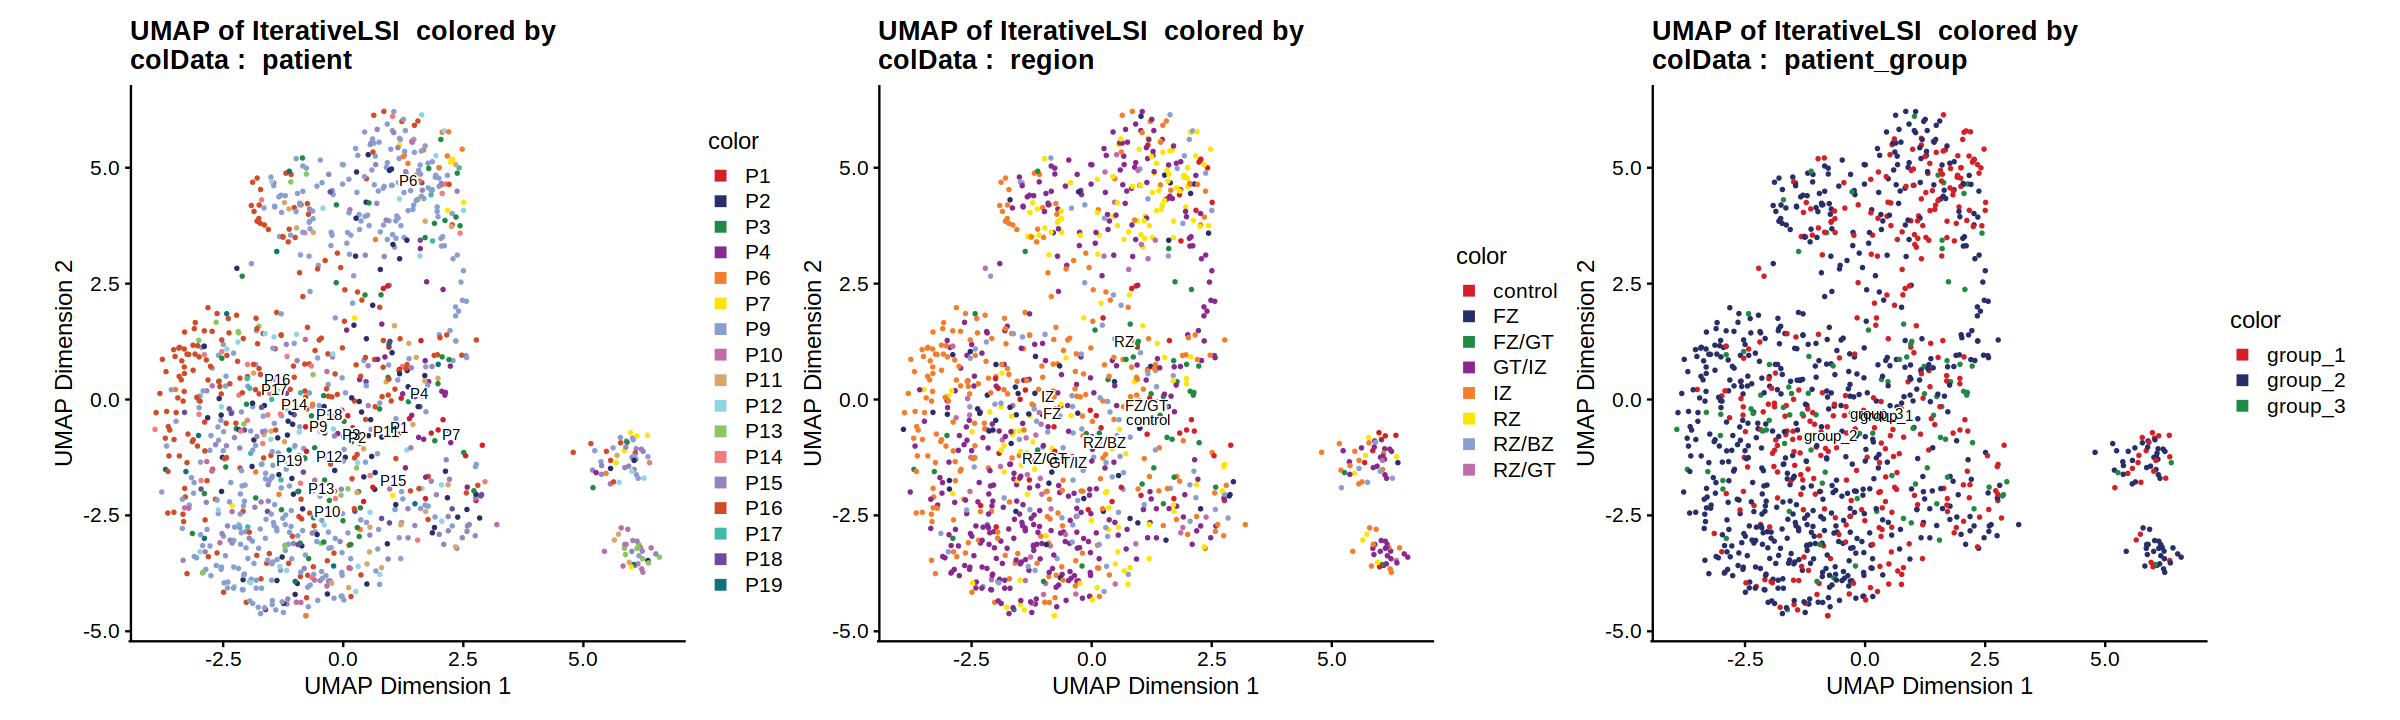

In [10]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [11]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony",
    groupBy = c("patient", "Sample", "region"),
    force = TRUE
)

proj <- addUMAP(
    ArchRProj = proj, 
    reducedDims = "Harmony", 
    name = "UMAP_Harmony", 
    nNeighbors = 30, 
    minDist = 0.5, 
    metric = "cosine",
    verbose = FALSE,
    force = TRUE
)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony converged after 8 iterations

23:28:21 Creating temp model dir /tmp/RtmpPrTpTX/dir2ef71f5f1a956a

23:28:21 Creating dir /tmp/RtmpPrTpTX/dir2ef71f5f1a956a

23:28:21 Changing to /tmp/RtmpPrTpTX/dir2ef71f5f1a956a

23:28:21 Creating /data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Lymphoid/data/snATAC/Embeddings/Save-Uwot-UMAP-Params-Harmony-2ef71f10528645-Date-2021-11-16_Time-23-28-21.tar



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71fc356167-Date-2021-11-16_Time-23-28-25.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71fc356167-Date-2021-11-16_Time-23-28-25.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71f41e987cc-Date-2021-11-16_Time-23-28-25.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71f41e987cc-Date-2021-11-16_Time-23-28-25.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71f5eea489c-Date-2021-11-16_Time-23-28-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71f5eea489c-Date-2021-11-1

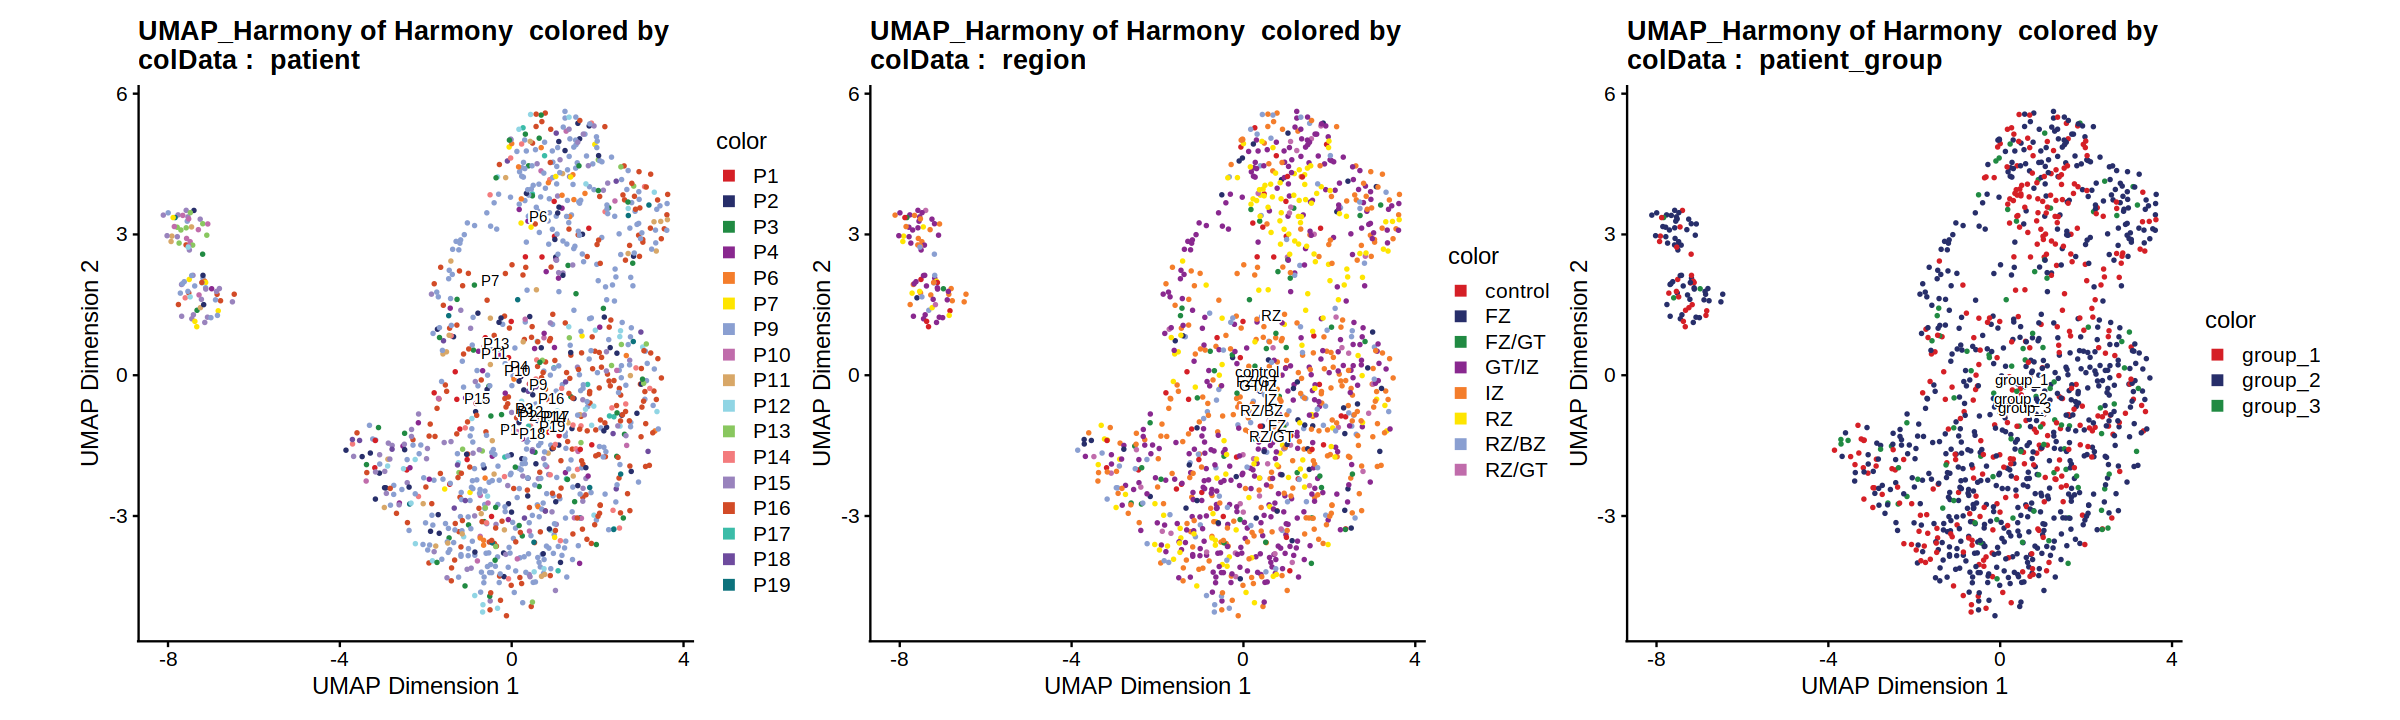

In [12]:
p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p2 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "region", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

p3 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "patient_group", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.width = 20, repr.plot.height = 6)

p1 + p2 + p3

In [13]:
proj <- addImputeWeights(proj, reducedDims = "Harmony")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-2ef71f4048fc90-Date-2021-11-16_Time-23-31-53.log
If there is an issue, please report to github with logFile!

2021-11-16 23:31:53 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71f4303dbc4-Date-2021-11-16_Time-23-31-58.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-16 23:31:58 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 


Imputing Matrix

Using weights on disk

1 of 1

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71f4303dbc4-Date-2021-11-16_Time-23-31-58.log

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71f10e989aa-Date-2021-11-16_Time-23-32-00.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2021-11-16 23:32:00 : 

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 
29 
30 


Imputing Matrix

Using we

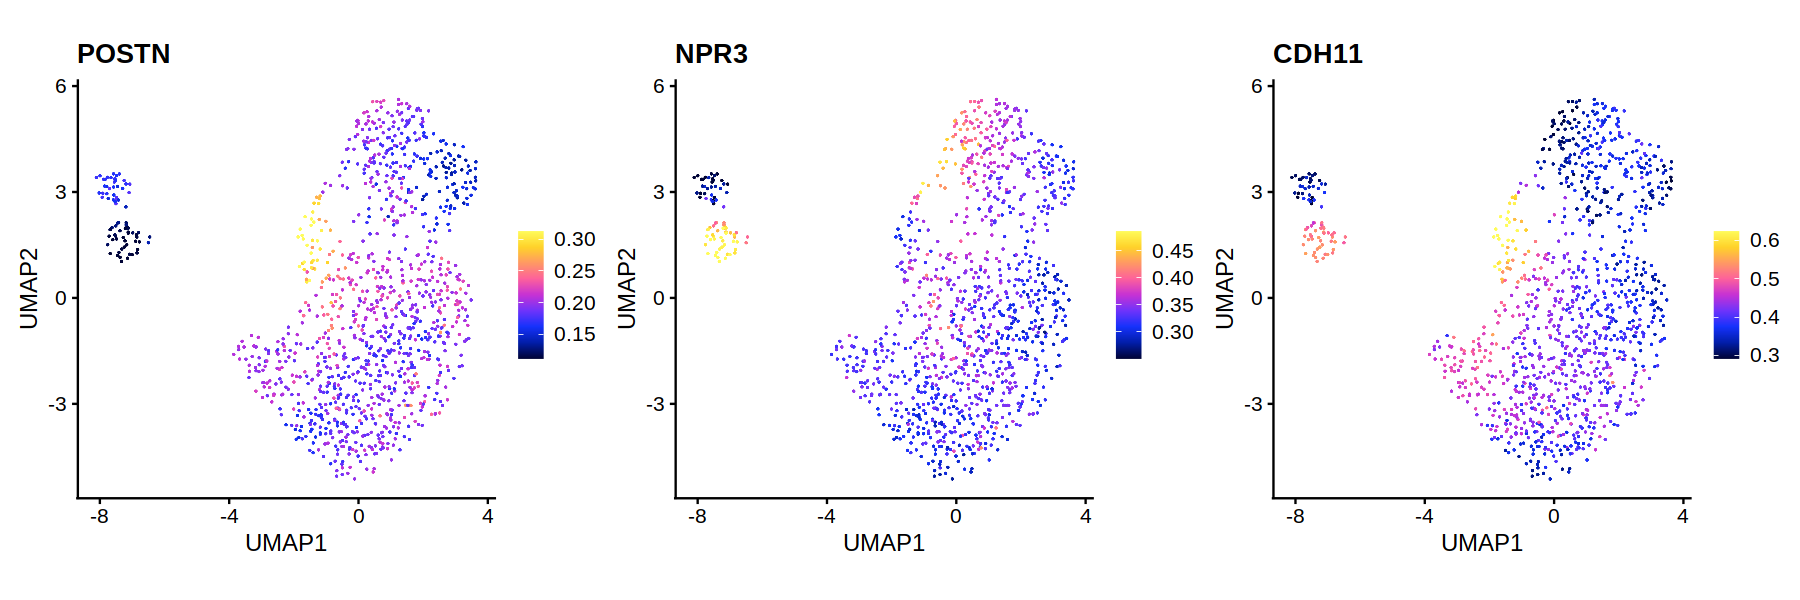

In [14]:
p1 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "POSTN",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
    xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("POSTN") +
    theme(legend.title = element_blank())

p2 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "NPR3",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("NPR3") +
        theme(legend.title = element_blank())

p3 <- plotEmbedding(ArchRProj = proj,
                    colorBy = "GeneScoreMatrix",
                    name = "CDH11",
                    embedding = "UMAP_Harmony",
                    plotAs = "points",
                   size = 1) +
    theme_cowplot() +
        xlab("UMAP1") + ylab("UMAP2") +
    ggtitle("CDH11") +
        theme(legend.title = element_blank())


options(repr.plot.height = 5, repr.plot.width = 15)

p1 + p2 + p3

ArchR logging to : ArchRLogs/ArchR-addClusters-2ef71f50dd41f2-Date-2021-11-16_Time-23-32-50.log
If there is an issue, please report to github with logFile!

Overriding previous entry for Clusters

2021-11-16 23:32:50 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Warning message:
“The following arguments are not used: row.names”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1170
Number of edges: 59197

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7973
Number of communities: 4
Elapsed time: 0 seconds


2021-11-16 23:32:52 : Testing Outlier Clusters, 0.033 mins elapsed.

2021-11-16 23:32:52 : Assigning Cluster Names to 4 Clusters, 0.033 mins elapsed.

2021-11-16 23:32:52 : Finished addClusters, 0.035 mins elapsed.

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-2ef71f15ff1805-Date-2021-11-16_Time-23-32-52.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-2ef71f15ff1805-Date-2021-11-16_Time-23-32-52.log



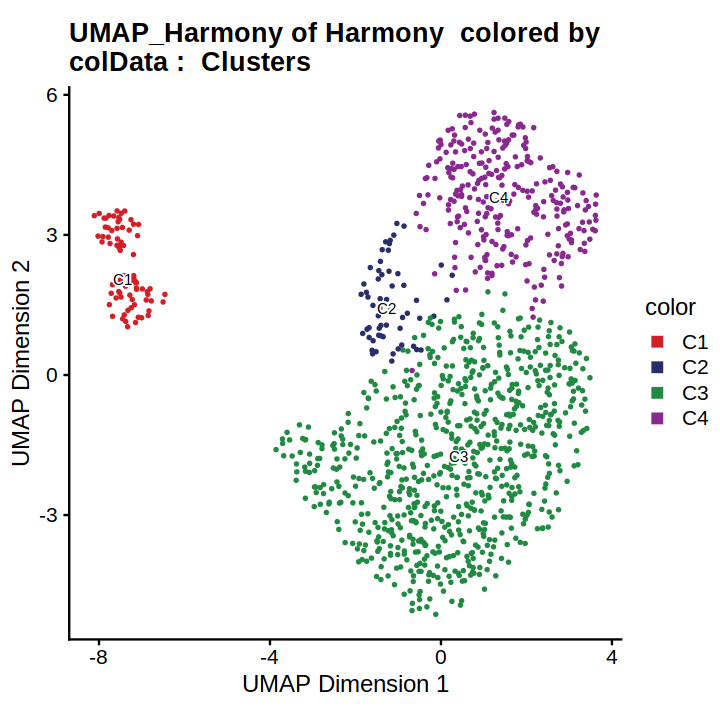

In [15]:
## clustering
proj <- addClusters(
    input = proj,
    reducedDims = "Harmony",
    method = "Seurat",
    name = "Clusters",
    resolution = 0.4,
    force = TRUE
)

p1 <- plotEmbedding(ArchRProj = proj, 
              colorBy = "cellColData", 
              name = "Clusters", embedding = "UMAP_Harmony",plotAs = "points",
                   size = 0.5, labelAsFactors = FALSE, rastr = FALSE) +
    theme_cowplot()

options(repr.plot.height = 6, repr.plot.width = 6)

p1

In [16]:
table(proj@cellColData$Clusters)


 C1  C2  C3  C4 
 79  57 753 281 

In [17]:
cM <- confusionMatrix(paste0(proj$Clusters), paste0(proj$Sample))
cM

   [[ suppressing 30 column names ‘CK171’, ‘CK380’, ‘CK168’ ... ]]



4 x 30 sparse Matrix of class "dgCMatrix"
                                                                              
C3 27 19 17 10 18 43 19 140 7 9 10 4 32 21 11 10  8 67 17 13 14 56 20 50 19 18
C1  1  4  2  .  .  3  .   7 . .  . 6  2  3  .  1  1  1  8  1  8  3  1  4  9  2
C4  4  9  9  5  5 46  3  35 4 3  5 6 11  3  1  2 10 22  4  2  3 15  7 28  3 15
C2  3  5  .  1  .  .  1  15 2 .  . .  1  .  1  2  .  9  4  .  .  1  1  4  .  7
             
C3 24 6 10 34
C1  8 2  2  .
C4  7 4  2  8
C2  . .  .  .

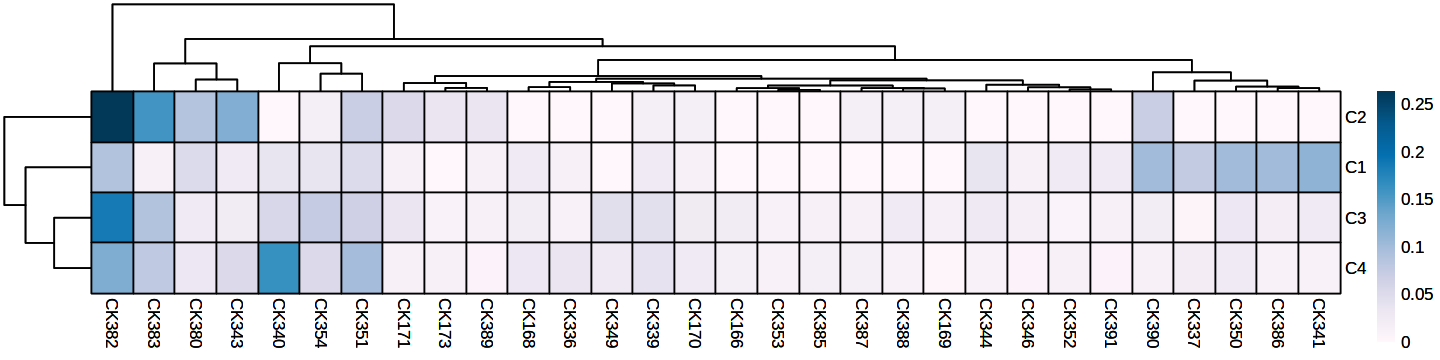

In [18]:
options(repr.plot.width = 12, repr.plot.height = 3)

library(pheatmap)
cM <- cM / Matrix::rowSums(cM)
p <- pheatmap::pheatmap(
    mat = as.matrix(cM), 
    color = paletteContinuous("whiteBlue"), 
    border_color = "black"
)
p

In [20]:
meta.data <- as.data.frame(proj@cellColData)

In [21]:
cols <- ArchR::paletteDiscrete(meta.data$Clusters)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.



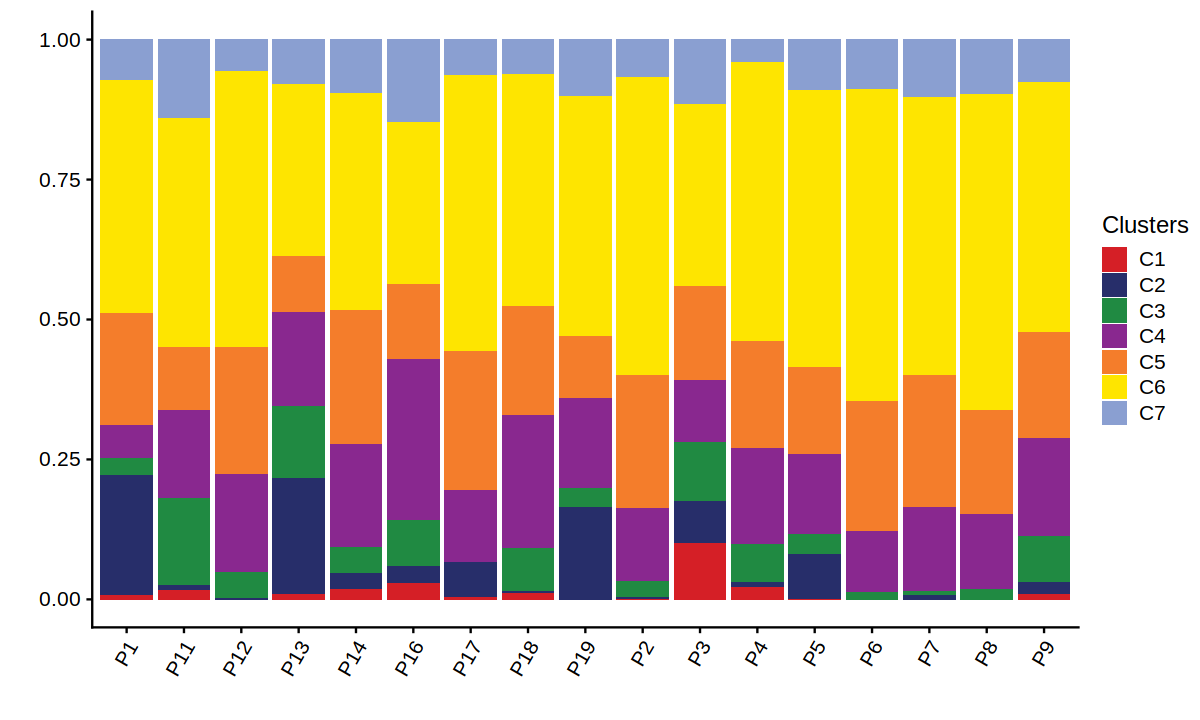

In [22]:
df_plot <- meta.data %>%
    group_by(patient, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



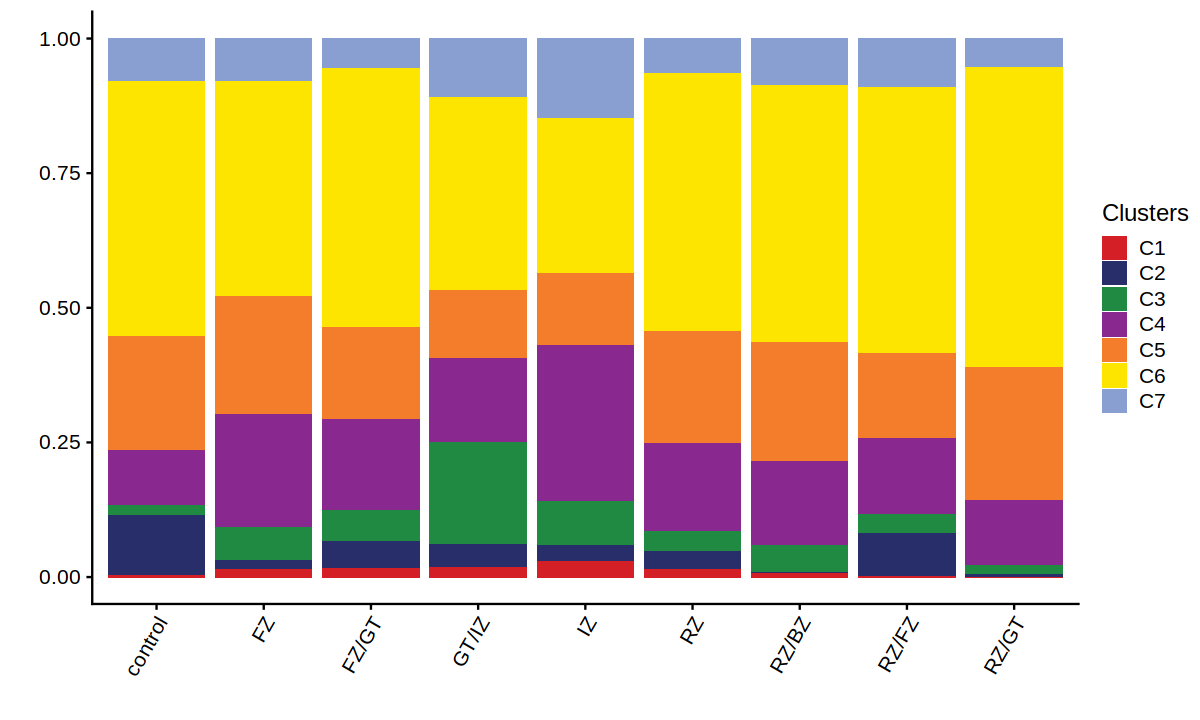

In [23]:
df_plot <- meta.data %>%
    group_by(region, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(region, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'patient_group'. You can override using the `.groups` argument.



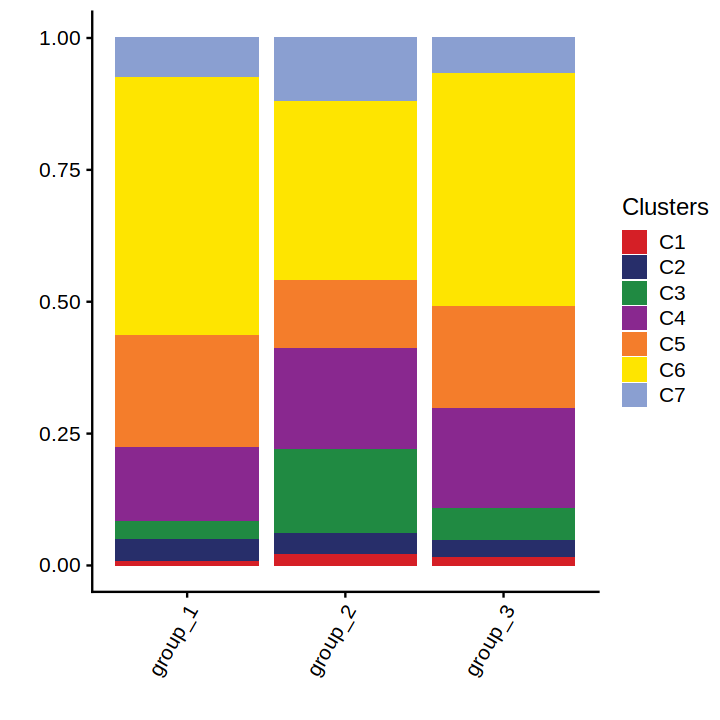

In [24]:
df_plot <- meta.data %>%
    group_by(patient_group, Clusters) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient_group, cell_proportion, fill=Clusters)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 6, repr.plot.height = 6)

p1

In [ ]:
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)

In [15]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 8

Matrix products: default
BLAS/LAPACK: /home/rs619065/miniconda3/envs/r-4.0.3/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gtable_0.3.0                gridExtra_2.3              
 [3] uwot_0.1.10                 cowplot_1.1.1              
 [5] dplyr_1.0.7                 harmony_1.0                
 [7] Rcpp_1.0.7                  Signac_1.4.0               
 [9] SeuratObject_4.0.2  